In [0]:
pip install numpy==1.23.3 --quiet --ignore-installed

Python interpreter will be restarted.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
petastorm 0.11.4 requires pyspark>=2.1.0, which is not installed.
sktime 0.21.1 requires pandas<2.1.0,>=1.1.0, but you have pandas 2.1.1 which is incompatible.
pycaret 3.1.0 requires pandas<2.0.0,>=1.3.0, but you have pandas 2.1.1 which is incompatible.
pycaret 3.1.0 requires scikit-learn<1.3.0,>=1.0, but you have scikit-learn 1.3.2 which is incompatible.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.
mlflow 2.7.1 requires cloudpickle<3, but you have cloudpickle 3.0.0 which is incompatible.
econml 0.14.1 requires scikit-learn<1.3,>0.22.0, but you have scikit-learn 1.3.2 which is incompatible.
econml 0.14.1 requires shap<0.42.0,>=0.38.1, but you have shap 0.43.0 which is incompatible.
pandas-profiling 3.1.0 requires joblib~=1.0.1, but you

In [0]:
pip install -U xgboost yellowbrick numpy typing dtreeviz matplotlib feature-engine numba seaborn shap Jinja2 --quiet --ignore-installed  

Python interpreter will be restarted.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
petastorm 0.11.4 requires pyspark>=2.1.0, which is not installed.
sktime 0.21.1 requires numpy<1.26,>=1.21.0, but you have numpy 1.26.1 which is incompatible.
sktime 0.21.1 requires pandas<2.1.0,>=1.1.0, but you have pandas 2.1.1 which is incompatible.
python-pptx 0.6.22 requires Pillow<=9.5.0,>=3.3.2, but you have pillow 10.1.0 which is incompatible.
pycaret 3.1.0 requires numpy<1.24,>=1.21, but you have numpy 1.26.1 which is incompatible.
pycaret 3.1.0 requires pandas<2.0.0,>=1.3.0, but you have pandas 2.1.1 which is incompatible.
pycaret 3.1.0 requires scikit-learn<1.3.0,>=1.0, but you have scikit-learn 1.3.2 which is incompatible.
pycaret 3.1.0 requires scipy~=1.10.1, but you have scipy 1.11.3 which is incompatible.
mlflow 2.7.1 requires cloudpickle<3, but you have cloudpi

In [0]:
%sh apt-get install -y graphviz

Reading package lists...
Building dependency tree...
Reading state information...
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [0]:
%config InlineBackend.figure_format = 'retina' # Make visualizations look good
#%config InlineBackend.figure_format = 'svg' 
%matplotlib inline

# Approach 1 - XGB Regressor

##Step 0 : Import Libraries

In [0]:
%python 
import xgboost as xgb
print(xgb.__version__)

2.0.1


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


In [0]:
import mlflow

mlflow.autolog(disable=True)

mlflow.sklearn.autolog(disable=True)

mlflow.xgboost.autolog(disable=True)

mlflow.statsmodels.autolog(disable=True)

##Step 1 : Load Data from parquet files

In [0]:
%python 

X_train = pd.read_parquet("/dbfs/FileStore/user/Hastings_Claims/data/X_train.parquet")
X_test = pd.read_parquet("/dbfs/FileStore/user/Hastings_Claims/data/X_test.parquet")

y_train = pd.read_parquet("/dbfs/FileStore/user/Hastings_Claims/data/y_train.parquet")
y_test = pd.read_parquet("/dbfs/FileStore/user/Hastings_Claims/data/y_test.parquet")

train_df = pd.read_parquet("/dbfs/FileStore/user/Hastings_Claims/data/train_df.parquet")
test_df = pd.read_parquet("/dbfs/FileStore/user/Hastings_Claims/data/test_df.parquet")

df_fnol_modeling_data = pd.read_parquet("/dbfs/FileStore/user/Hastings_Claims/data/df_fnol_modeling_data.parquet")

##Step 2 : Define the XGB Regressor Model

In [0]:
# Define the XGBoost Regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

##Step 3 : Define the XGB Regressor Hyper Parameters for Grid Search

In [0]:
# Define a grid of hyperparameters to search
#param_grid = {
#    'n_estimators': [100, 200, 300, 400, 500, 800],
#    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#    'learning_rate': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 1.0],
#    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9],
#}

# Create a GridSearchCV object with cross-validation
#grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Perform the grid search to find the best hyperparameters
#grid_search.fit(X_train, y_train)

##Step 4 : Use the Results of Hyper Parameters Grid Search

In [0]:
# Get the best hyperparameters from the grid search
best_params = {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.9}
#best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'subsample': 0.9}


In [0]:
# Train the XGBoost model with the best hyperparameters
best_xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params)
best_xgb_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_reg.predict(X_test)

##Step 5 : Validation Dataset Metrics of the XGBoost Regressor Model 

In [0]:
# Calculate the mean squared error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_test, y_pred)
# Model Interpretation
print(f'R-squared (R2): {r2}')

Mean Squared Error: 2514971381.9511843
Root Mean Squared Error (RMSE): 50149.49034587674
R-squared (R2): -0.4785076821132037


##Step 6 : Feature Importance of the XGBoost Regressor Model 

Out[19]: <Axes: >

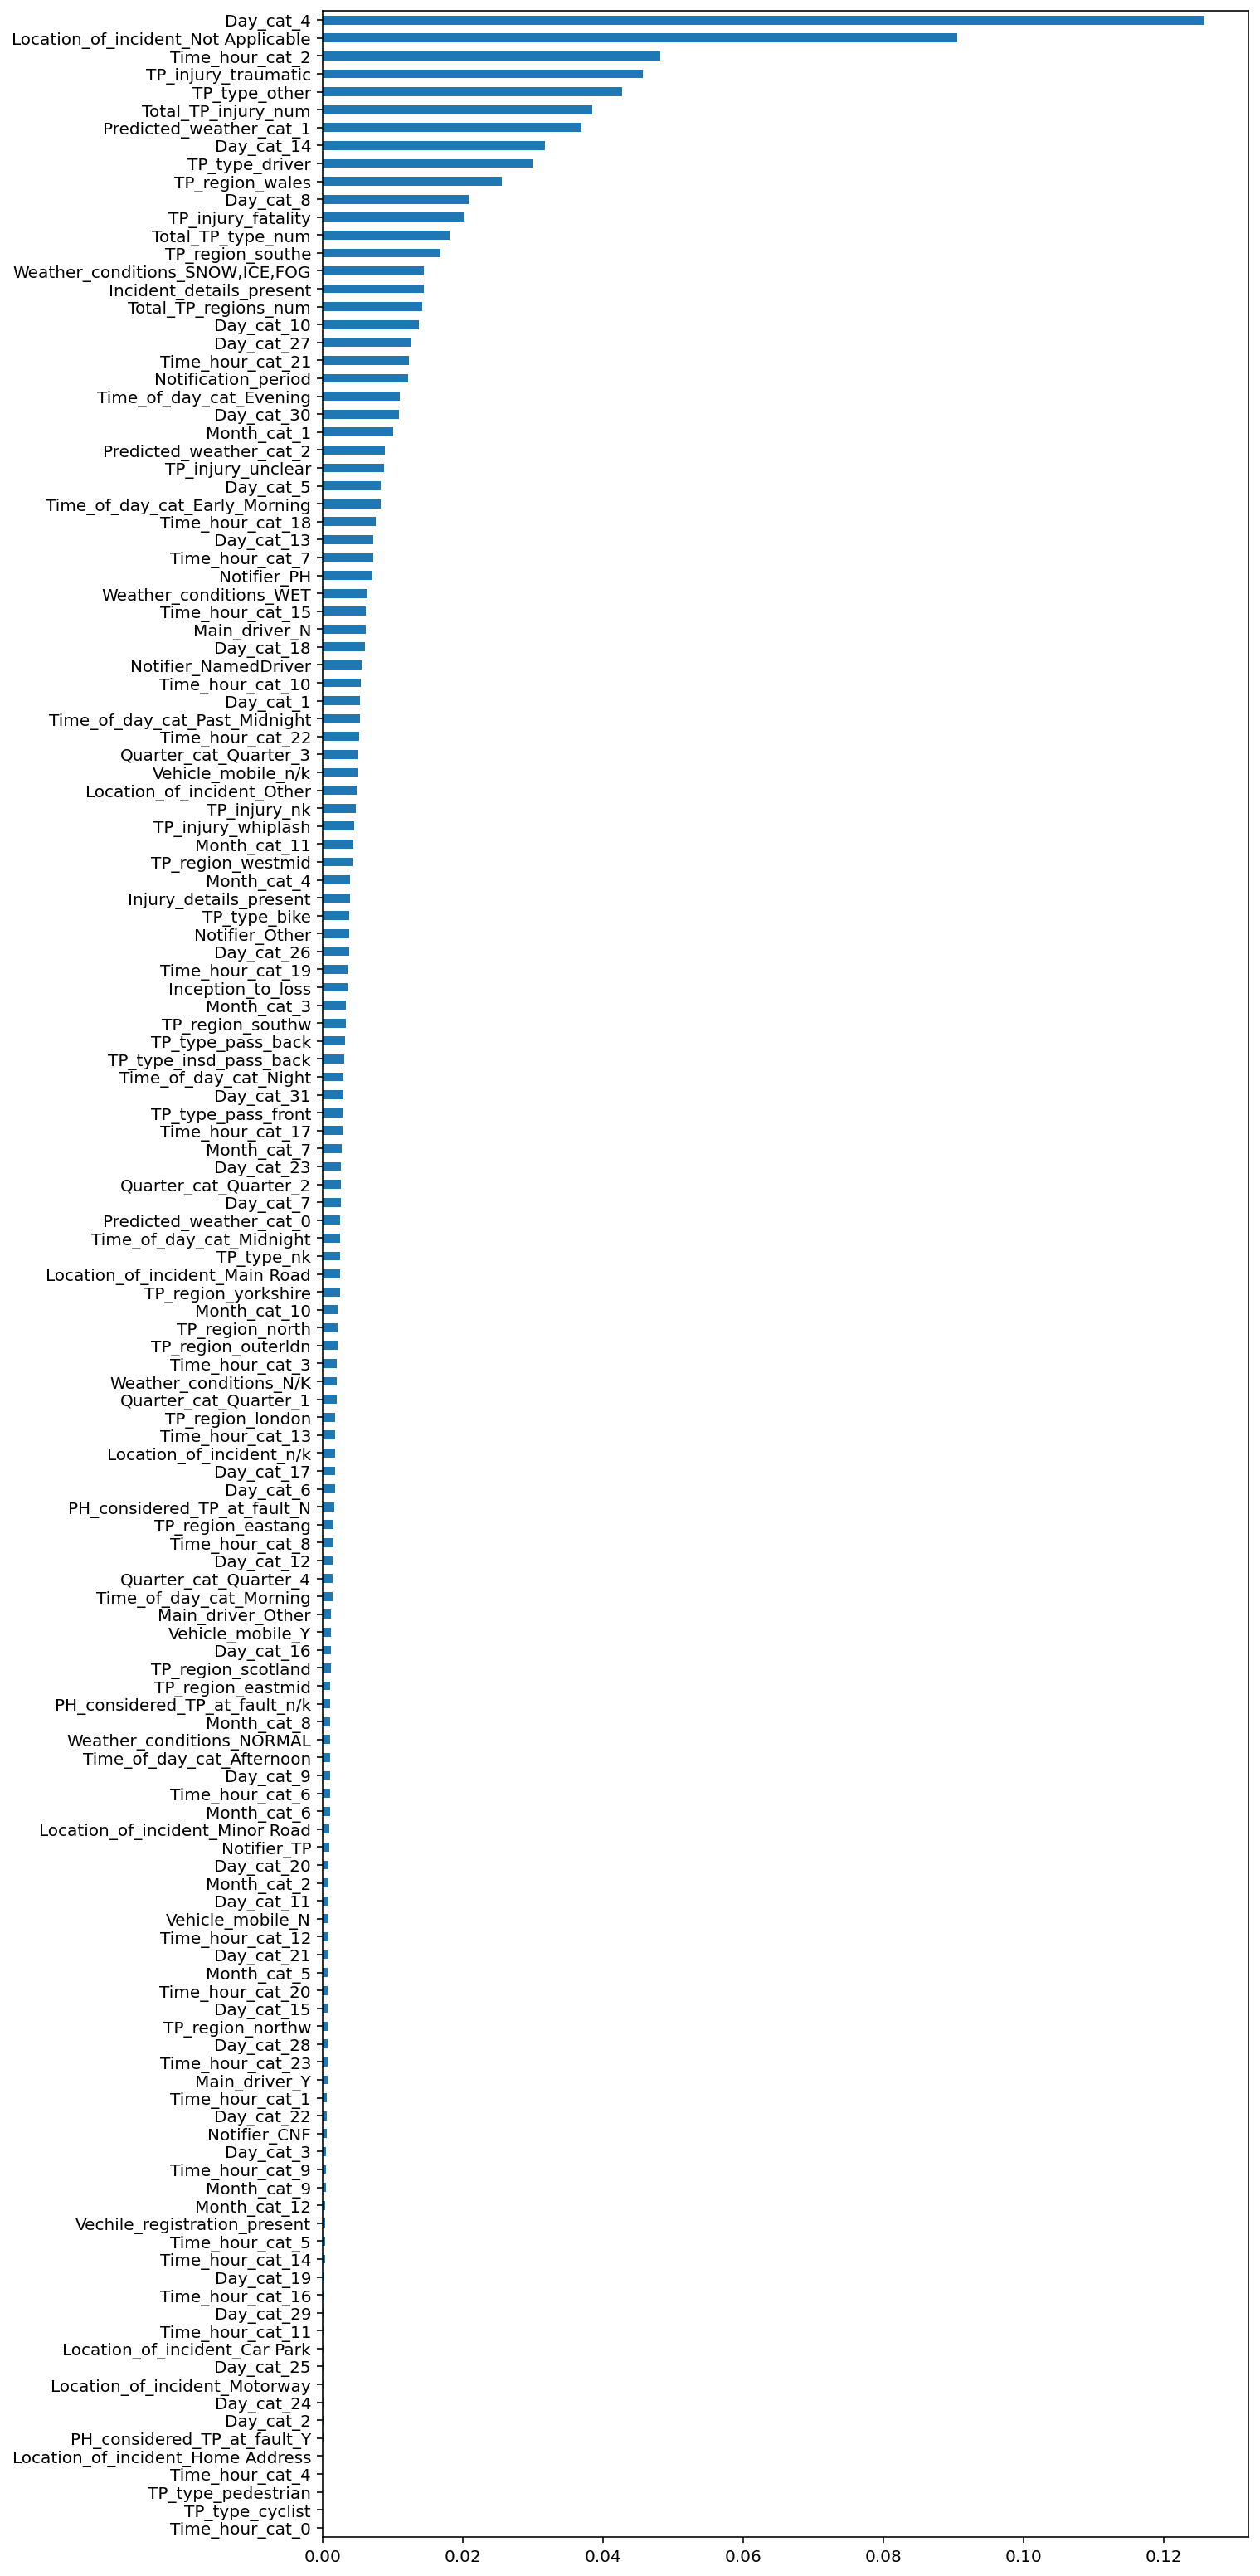

In [0]:
#feature importance in XGBoost
plt.figure(figsize=(10, 28))  # Adjust the size as needed

(pd.Series(best_xgb_reg.feature_importances_, index=X_train.columns)
 .sort_values()
 .plot.barh()
)

#Approach 2 - XGB gblinear

##Step 1 : Define the XGB gblinear Model

In [0]:
# Define the XGBoost Regressor
xgb_reg = xgb.XGBRegressor(booster = 'gblinear', objective='reg:squarederror', random_state=42)

##Step 2 : Define the XGB gblinear Hyper Parameters for Grid Search

In [0]:
#kfold = KFold(n_splits=5, shuffle=True, random_state=2)

In [0]:
def grid_search(params, reg=xgb.XGBRegressor(booster = 'gblinear')):
  grid_reg = GridSearchCV(reg, params, scoring='neg_mean_squared_error', verbose=1, cv=kfold)
  grid_reg.fit(X_train, y_train)
#  Get the best hyperparameters from the grid search
  best_params = grid_reg.best_params_
  print("Best Hyperparameters: ", best_params)
  best_score = np.sqrt(-grid_reg.best_score_)
  print("Best Score: ", best_score)

In [0]:
#grid_search(params={'reg_lambda': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 1.0, 5.0, 5.15, 5.25, 5.5, 5.75, 5.9, 6.0],
#                    'reg_alpha': [0.001, 0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 1.0, 5.0, 5.15, 5.25, 5.5, 5.75, 5.9, 6.0], 
#                    'feature_selector': ['greedy', 'thrifty'], 'updater': ['coord_descent'], 'top_k' : [1,3,5,7,9,11,13,15]
#                    })

##Step 3 : Use the Results of Hyper Parameters Grid Search

In [0]:
# Train the XGBoost model with the best hyperparameters
best_xgb_reg = xgb.XGBRegressor(booster = 'gblinear', objective='reg:squarederror', random_state=42, reg_alpha=5.25, reg_lambda=0.05, feature_selector= 'thrifty', top_k= 7, updater= 'coord_descent')
best_xgb_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_xgb_reg.predict(X_test)

y_pred_train = best_xgb_reg.predict(X_train)

##Step 4 : Validation Dataset Metrics of the XGB gblinear Model 

In [0]:
# Calculate the mean squared error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error (RMSE): {rmse}')

r2 = r2_score(y_test, y_pred)
# Model Interpretation
print(f'R-squared (R2): {r2}')

Mean Squared Error: 1641720953.2549582
Root Mean Squared Error (RMSE): 40518.15584716262
R-squared (R2): 0.034860969515087104


##Step 5 : Feature Importance of the XGB gblinear Model 

Out[26]: <Axes: >

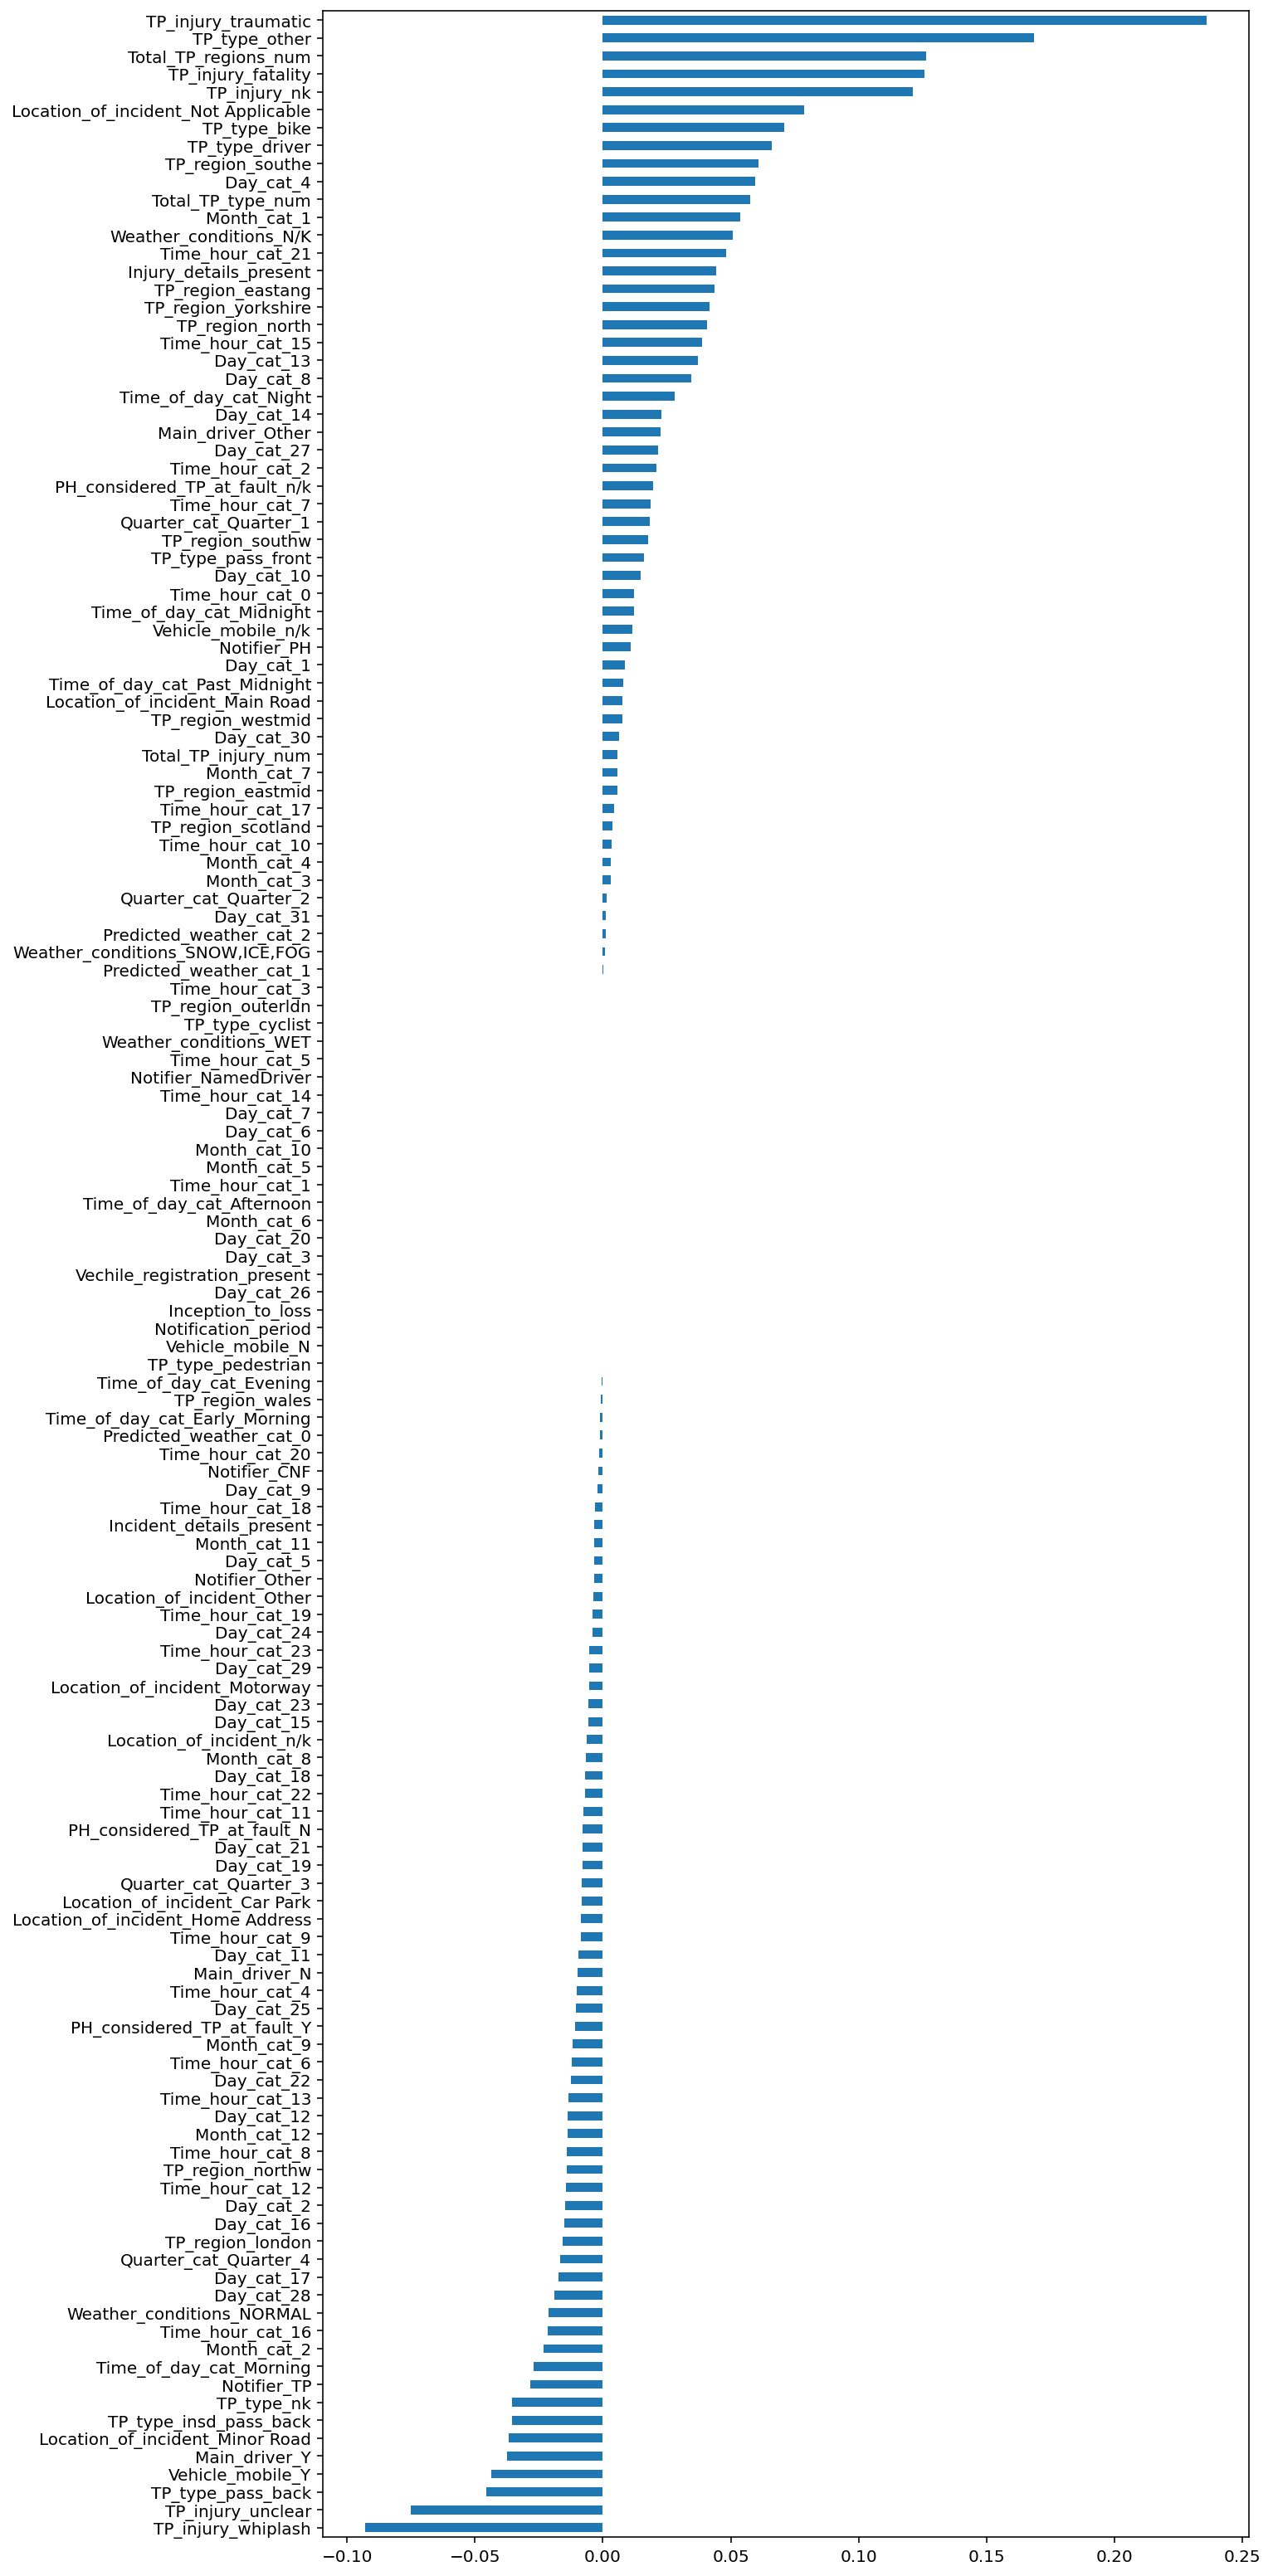

In [0]:
#feature importance in XGB gblinear
plt.figure(figsize=(10, 28))  # Adjust the size as needed

(pd.Series(best_xgb_reg.feature_importances_, index=X_train.columns)
 .sort_values()
 .plot.barh()
)

##Step 6 : Plotting of Actual vs Predicted

rmse training: 54766.607	 rmse test: 40518.156


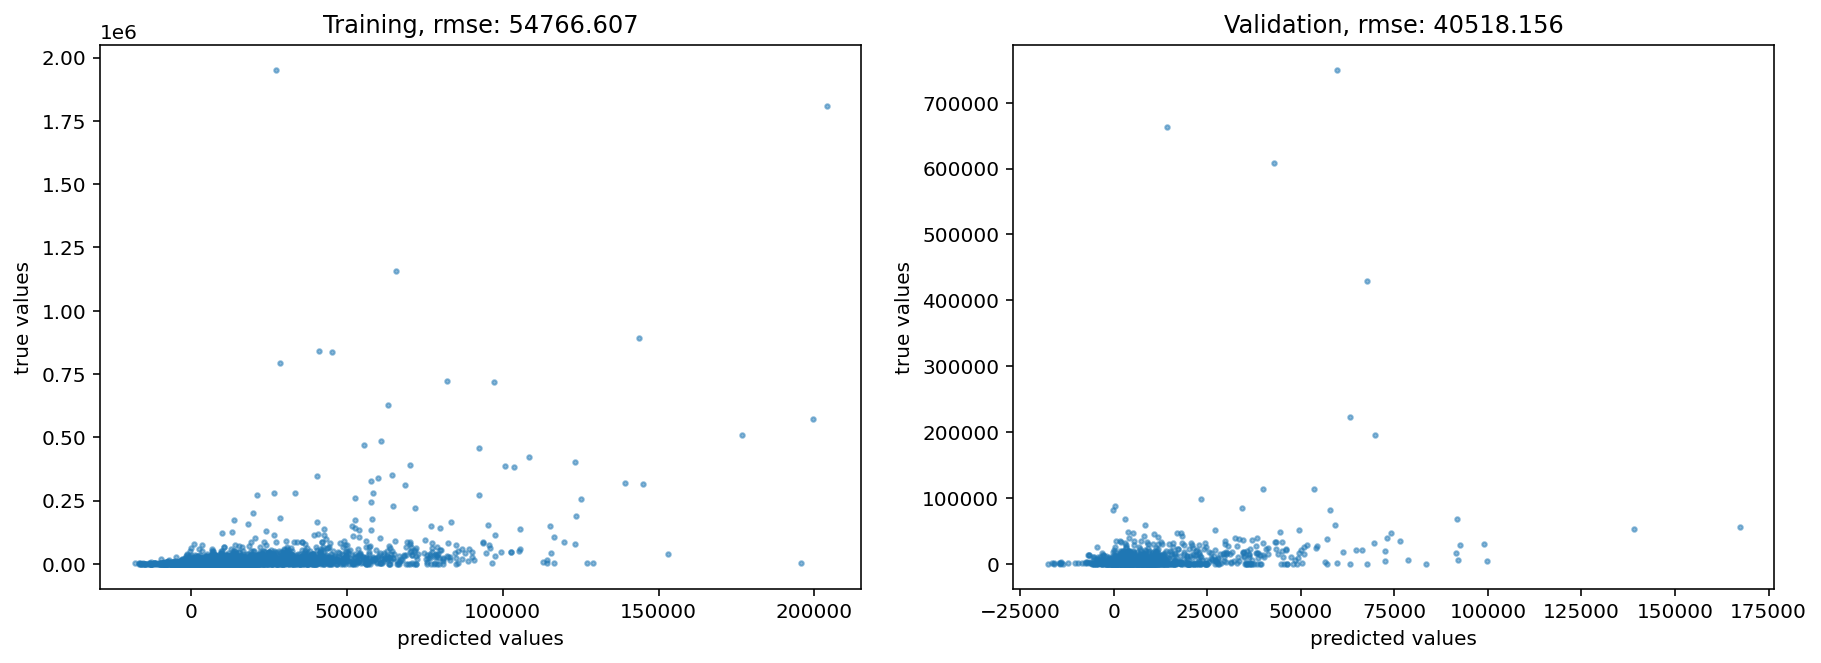

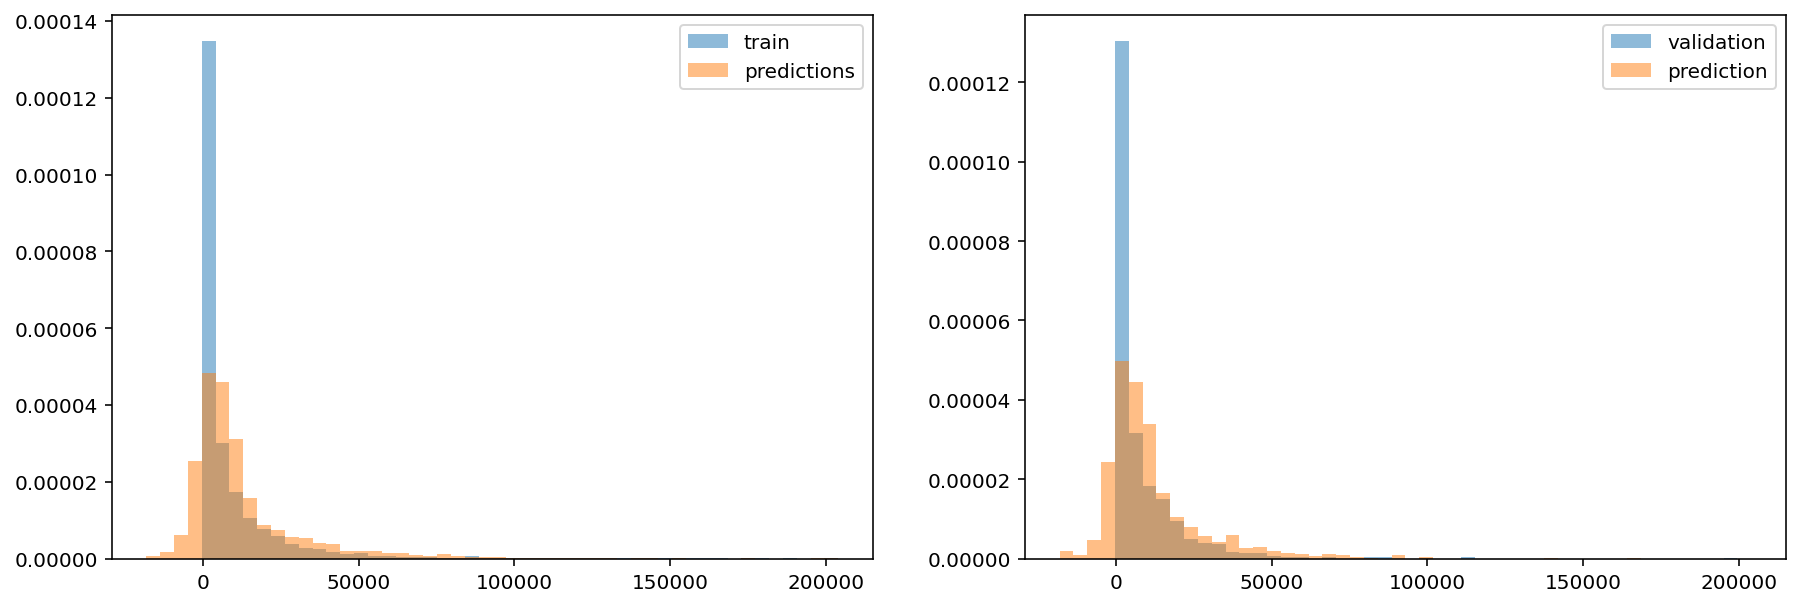

In [0]:
# calculate errors
rmse_train = mean_squared_error(y_pred_train, y_train, squared=False)
rmse_test = mean_squared_error(y_pred, y_test, squared=False)
print(f"rmse training: {rmse_train:.3f}\t rmse test: {rmse_test:.3f}")
  

# plot results  
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
    
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].scatter(y_pred_train, y_train, alpha=0.5, s=5)
axes[0].set_xlabel('predicted values')
axes[0].set_ylabel('true values')
axes[0].set_title(f"Training, rmse: {rmse_train:.3f}")
axes[1].scatter(y_pred, y_test, alpha=0.5, s=5)
axes[1].set_xlabel('predicted values')
axes[1].set_ylabel('true values')
axes[1].set_title(f"Validation, rmse: {rmse_test:.3f}");
    
fig, axes = plt.subplots(1, 2, figsize=(15,5))
frequency, bins = np.histogram(y_train, bins=50, range=[np.min(y_pred_train), np.max(y_pred_train)])
axes[0].hist(y_train, alpha=0.5, bins=bins, density='true', label="train")
axes[0].hist(y_pred_train, alpha=0.5, bins=bins, density='true', label="predictions")
axes[0].legend()
axes[1].hist(y_test, alpha=0.5, bins=bins, density='true', label="validation")
axes[1].hist(y_pred, alpha=0.5, bins=bins, density='true', label="prediction")
axes[1].legend();

##Step 7 : Understanding Datasize for retraining needs

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

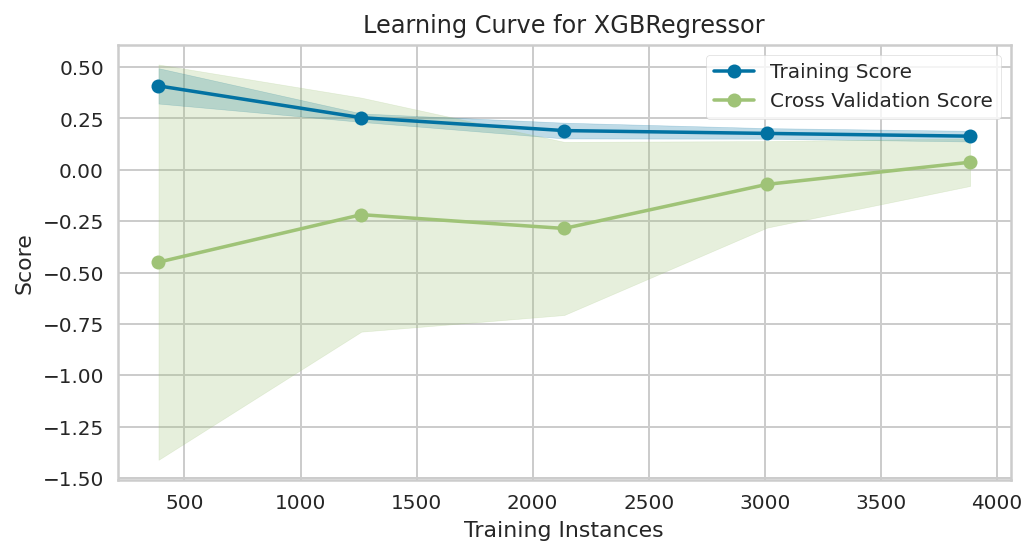

In [0]:
#we care about the cross validation score in green
import yellowbrick.model_selection as ms

fig, ax = plt.subplots(figsize=(8,4))
viz = ms.learning_curve(best_xgb_reg, X_train, y_train, ax=ax)